# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations

In [3]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [4]:
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [6]:
y = df.drop('list_price', axis=1)
X = sm.add_constant(y)
model = sm.OLS(df['list_price'],X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     726.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:51:00   Log-Likelihood:                -54056.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10775   BIC:                         1.090e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               64.2821      1.551     41.435      0.000      61.241      67.323
piece_count                                         75.7184      0.776     97.605      0.000      74.198      77.239
num_reviews                                          6.4270      0.590     10.888      0.000       5.270       7.584
play_star_rating                                     5.2682      0.542      9.717      0.000       4.205       6.331
star_rating                                         -1.4380      0.617     -2.331      0.020      -2.647      -0.229
val_star_rating                                     -8.5504      0.550    -15.545      0.000      -9.628      -7.472
ages_10+                                           122.9923      5.753     21.378      0.000     111.715     134.270
ages_10-14                                         -23.1648      7.788     -2.975      0.003     -38.430      -7.899
ages_10-16                                         -11.7969      3.528     -3.343      0.001     -18.713      -4.881
ages_10-21                                          55.9674      6.415      8.725      0.000      43.393      68.542
ages_11-16                                         -18.2277      5.058     -3.604      0.000     -28.141      -8.314
ages_12+                                            70.5837      4.828     14.619      0.000      61.119      80.048
ages_12-16                                         -57.4333      5.882     -9.765      0.000     -68.962     -45.904
ages_14+                                            24.6493      3.579      6.887      0.000      17.634      31.665
ages_16+                                            32.9512      5.251      6.275      0.000      22.658      43.245
ages_1½-3                                           -9.0486      2.087     -4.336      0.000     -13.139      -4.958
ages_1½-5                                           -4.1380      2.605     -1.588      0.112      -9.244       0.969
ages_2-5                                            14.9724      1.459     10.260      0.000      12.112      17.833
ages_4+                                            -18.5801      5.504     -3.376      0.001     -29.370      -7.791
ages_4-7                                            -6.1664      2.909     -2.120      0.034     -11.868      -0.465
ages_4-99                                           -3.0337      3.138     -0.967      0.334      -9.185       3.118
ages_5+                                             -9.6179      2.705     -3.556      0.000     -14.920      -4.316
ages_5-12                                          -34.9818      2.739    -12.771      0.000     -40.351     -29.613
ages_5-8                                 

In [ ]:
# Your code here - Manipulate column names

In [ ]:
# Your code here - Define the target and predictors

In [ ]:
# Your code here - Split into train and test
train, test = None

In [ ]:
# Your code here - Fit the actual model

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [7]:
# Your code here - Remove features which do not appear to be statistically relevant
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [8]:
X = df.drop('list_price', axis=1)
y = df['list_price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  piece_count                    with p-value 0.0
Add  theme_name_SERIOUS PLAY®       with p-value 0.0
Add  theme_name_Creator Expert      with p-value 1.68204e-150
Add  theme_name_MINDSTORMS®         with p-value 1.56858e-160
Add  val_star_rating                with p-value 1.07641e-92
Add  ages_2-5                       with p-value 1.13777e-86
Add  theme_name_Star Wars™          with p-value 7.09901e-46
Add  ages_14+                       with p-value 1.34304e-28
Add  play_star_rating               with p-value 1.3606e-30
Add  theme_name_BOOST               with p-value 1.1648e-26
Add  review_difficulty_Average      with p-value 1.90664e-23
Add  review_difficulty_Challenging  with p-value 4.9176e-34
Add  country_CA                     with p-value 4.00168e-20
Add  ages_12-16                     with p-value 5.92135e-17
Add  country_US                     with p-value 3.51164e-16
Add  theme_name_THE LEGO® NINJAGO® MOVIE™ with p-value 2.56246e-14
Add  country_DN                    

In [9]:
# Your code here - Refit the model
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y, X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1359.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:56:46   Log-Likelihood:                -54096.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10819   BIC:                         1.087e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               57.9556      0.928     62.430      0.000      56.136      59.775
piece_count                                         75.8967      0.703    107.955      0.000      74.519      77.275
theme_name_SERIOUS PLAY®                           232.1513      4.356     53.293      0.000     223.613     240.690
theme_name_Creator Expert                         -126.2584      4.317    -29.248      0.000    -134.720    -117.797
val_star_rating                                     -8.4348      0.527    -15.998      0.000      -9.468      -7.401
ages_2-5                                            22.0996      2.327      9.496      0.000      17.538      26.662
theme_name_Star Wars™                               11.3052      1.266      8.930      0.000       8.824      13.787
ages_14+                                            47.0987      3.364     14.001      0.000      40.505      53.693
play_star_rating                                     5.6140      0.526     10.681      0.000       4.584       6.644
theme_name_BOOST                                    78.6004      8.213      9.570      0.000      62.501      94.700
review_difficulty_Average                           14.1213      0.890     15.859      0.000      12.376      15.867
review_difficulty_Challenging                       15.6997      1.735      9.049      0.000      12.299      19.100
country_CA                                         -14.2638      1.375    -10.374      0.000     -16.959     -11.569
ages_12-16                                         -41.3740      5.841     -7.083      0.000     -52.824     -29.924
country_US                                         -11.8307      1.373     -8.615      0.000     -14.523      -9.139
theme_name_THE LEGO® NINJAGO® MOVIE™               -20.5666      2.094     -9.824      0.000     -24.670     -16.463
country_DN                                         -12.5029      1.612     -7.756      0.000     -15.663      -9.343
ages_10-21                                          74.8007      7.001     10.685      0.000      61.078      88.523
theme_name_Ideas                                  -132.8297      5.648    -23.520      0.000    -143.900    -121.760
num_reviews                                          5.9856      0.542     11.042      0.000       4.923       7.048
theme_name_Indoraptor Rampage at Lockwood Estate    57.4284      7.779      7.382      0.000      42.180      72.677
theme_name_Classic                                 -12.5789      2.117     -5.941      0.000     -16.729      -8.429
theme_name_Friends                                  -7.2457      1.641     -4.416      0.000     -10.462      -4.029
theme_name_Ghostbusters™                 

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [ ]:
# Your code here - Continue to refine the model

In [ ]:
# Your code here - Refit the model

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

Text(0.5, 1, 'Feature Correlation')

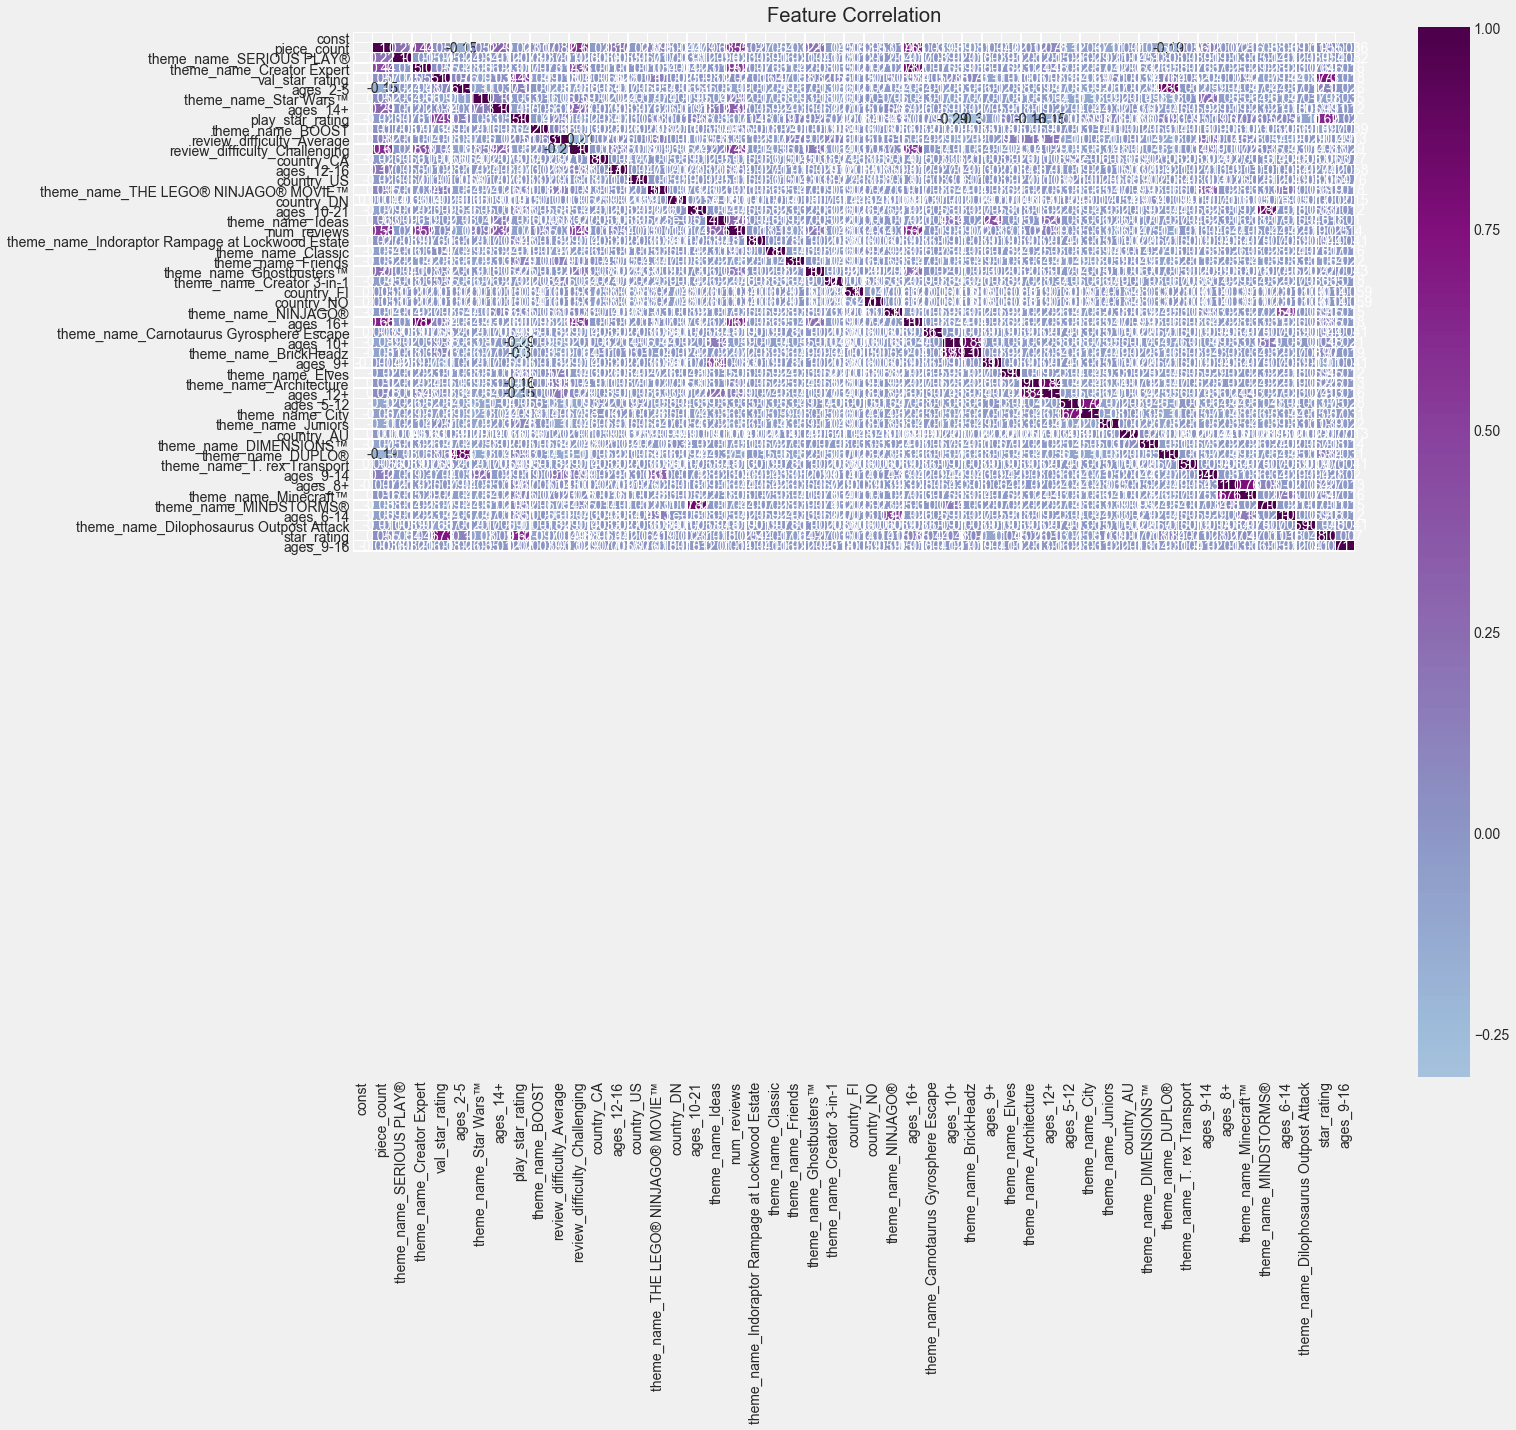

In [10]:
# Your code here - Code a way to identify multicollinearity
fig, ax = plt.subplots(figsize=(20,18))
sns.heatmap(X_with_intercept.corr(), annot=True, center=0, linewidth=.5, ax=ax, cmap="BuPu")
ax.set_ylim(len(df.corr())-0.25, -0.5)
plt.title('Feature Correlation')

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [ ]:
# Your code here - Subset features based on multicollinearity

In [ ]:
# Your code here - Refit model with subset features

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_with_intercept, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

8152 2718 8152 2718


In [14]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [15]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [16]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 1251.9260848234956
Test Mean Squarred Error: 1199.5553272643542


In [17]:
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X_with_intercept, y, cv=5, scoring=mse)
print(cv_5_results)
print(cv_5_results.mean())

[1134.5129883  1266.52932041 1285.58747112 1163.97394102 1528.06239494]
1275.7332231585929


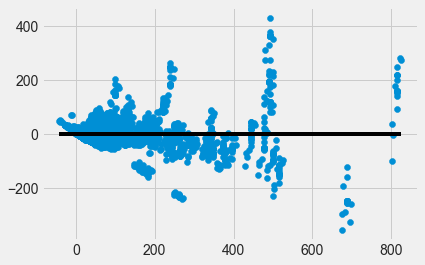

In [18]:
preds = linreg.predict(X_with_intercept)
residuals = y - preds
plt.scatter(preds, residuals)
plt.hlines(0, preds.min(), preds.max())

In [19]:
model = linreg.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8596126280109897
0.8679791771654036


In [20]:

r2 = round(linreg.score(X_with_intercept,y), 3)
print("R Squared:", r2)

R Squared: 0.862


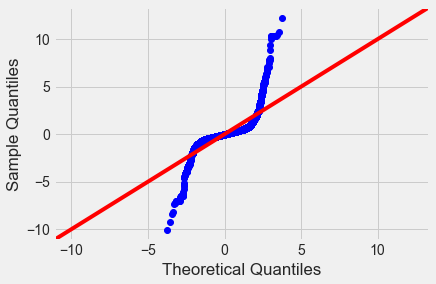

In [21]:
import scipy.stats as stats
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [ ]:
# Your code here - Check that the residuals are normally distributed


## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [ ]:
# Your code here - Check that the residuals are homoscedastic

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [ ]:
# Your code here - Check for outliers

In [ ]:
# Your code here
# Remove extreme outliers


# Rerun the model

In [ ]:
# Your code here - Check normality assumption

In [ ]:
# Your code here - Check the Homoscedasticity Assumption

In [ ]:
# Your code goes here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 